In [13]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from operator import add

In [24]:
class Cricket(TypedDict):
    #input
    runs: int
    fours: int
    sixes: int
    balls: int

    #output
    strike_rate: float
    boundary_percentage: float
    balls_per_boundary: float 
    summary: str
 
def strike_rate(state:Cricket) -> float:
    sr = (state["runs"]/state["balls"])*100   
    return {"strike_rate": sr}

def boundary_percentage(state:Cricket) -> float:
    total_boundaries=state["fours"]+state["sixes"]
    bp = (total_boundaries*100)/(state["runs"]) 
    return {"boundary_percentage": bp}

def balls_per_boundary(state:Cricket) -> float:
    total_boundaries=state["fours"]+state["sixes"]
    bpb = state["balls"]/total_boundaries
    return {"balls_per_boundary": bpb}

def summary_function(state:Cricket) -> str:
    summary = f"Strike Rate: {state['strike_rate']}, Boundary Percentage: {state['boundary_percentage']}, Balls per Boundary: {state['balls_per_boundary']}" 
    return {"summary": summary}

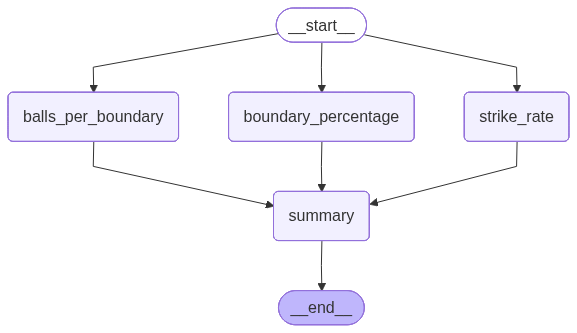

In [25]:
state_graph=StateGraph(Cricket) 

#nodes 
state_graph.add_node("strike_rate", strike_rate) 
state_graph.add_node("boundary_percentage", boundary_percentage) 
state_graph.add_node("balls_per_boundary", balls_per_boundary) 
state_graph.add_node("summary", summary_function)

#edges 
state_graph.add_edge(START, "strike_rate")
state_graph.add_edge(START, "boundary_percentage")
state_graph.add_edge(START, "balls_per_boundary")
state_graph.add_edge("strike_rate", "summary")
state_graph.add_edge("boundary_percentage", "summary")
state_graph.add_edge("balls_per_boundary", "summary")
state_graph.add_edge("summary", END) 

workflow = state_graph.compile() 
workflow



In [26]:
input_data = {
    "runs": 120,
    "fours": 10,
    "sixes": 5,
    "balls": 80
    }
output = workflow.invoke(input_data)

In [27]:
output

{'runs': 120,
 'fours': 10,
 'sixes': 5,
 'balls': 80,
 'strike_rate': 150.0,
 'boundary_percentage': 12.5,
 'balls_per_boundary': 5.333333333333333,
 'summary': 'Strike Rate: 150.0, Boundary Percentage: 12.5, Balls per Boundary: 5.333333333333333'}